In [1]:
import numpy as np

In [30]:
class Cluster(object):
    def __init__(self, nodes, weights, degrees, perimeter = None, area = None):
        self.nodes = nodes.astype(float)
        self.weights = weights.astype(float)
        self.degrees = degrees #this never changes       
        if(perimeter == None):
            self.perimeter = sum(self.weights)
        else:
            self.perimeter = perimeter
        if(area == None):
            self.area = 0
        else:
            self.area = area
        self.parent = None
        self.parentId = None
            
    def get_closest(self):
        if(sum(self.nodes) == len(self.nodes)):
            raise IndexError
        if(sum(self.weights) == 0):
            raise IndexError
        if (self.parent == None):
            temp_perimeter = self.perimeter - 2*self.weights + self.degrees
            temp_area = self.area + self.weights
            ratios = temp_area / (temp_perimeter + 0.000001) 
            next_vertex = np.argmax(ratios * np.logical_not(self.nodes))
            this_alpha = (self.area*temp_perimeter[next_vertex])/(self.perimeter*temp_area[next_vertex]) 
            return (next_vertex, temp_area[next_vertex], temp_perimeter[next_vertex], this_alpha)
        else:
            return self.parent.get_closest()
    
        
    def add_nodes(self, node_vector, weight):        
        self.perimeter = self.perimeter - 2*sum(self.weights*node_vector) + sum(self.degrees*node_vector)
        self.area = self.area + sum(self.weights*node_vector)
        self.weights = self.weights + weight.astype(float) 
        self.nodes = self.nodes + node_vector
        print("add_nodes" + str(self.nodes), str(self.nodes), self.area, self.perimeter)

        
        

In [31]:
graph = np.array([[0,1,1,0,0,0],[1,0,1,0,0,0],[1,1,0,1,0,0],[0,0,1,0,1,1],[0,0,0,1,0,1],[0,0,0,1,1,0]])
degrees = np.sum(graph, axis = 1) 
n = len(graph)
all_nodes = np.eye(n)
clusters = [Cluster(all_nodes[i],graph[i].astype(float),degrees) for i in range(n)]
clustered = [0 for i in range(n)]
for i in range(n):
    print(clusters[i].nodes) 
where_we_are = [0]
for i in range(22):
    here = where_we_are[-1]
    print("here",here)
    print(clusters[here].get_closest())
    
    next_node, next_area, next_perimeter, alpha = clusters[here].get_closest()
    print("has parent", clusters[next_node].parent)
    while(clusters[next_node].parent):
        next_node = clusters[next_node].parentId
    if(clusters[next_node].parent):
        print("in if")
    else: 
        #print("else", next_node)
        #print(clusters[next_node].get_closest())
        next_node_best, not_using, not_using2, not_using3 = clusters[next_node].get_closest()
        if(clusters[here].nodes[next_node_best] == 1):
            print("match!")
            clusters[here].add_nodes(clusters[next_node].nodes,clusters[next_node].weights)
            #clusters[here].add_node(next_node,graph[next_node].astype(float),next_area,next_perimeter)
            
            clusters[next_node].parent = clusters[here]
            clusters[next_node].parentId = here
            for i in range(n):
                print(clusters[i].nodes)  
            #clustered[next_node] = 1
            #clustered[here] = 1
        else:
            print("havnt gotten here yet")
            where_we_are.append(next_node)
            
for i in range(n):
    print(clusters[i].nodes)           

[ 1.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.]
here 0
(1, 1.0, 2.0, 0.0)
has parent None
match!
add_nodes[ 1.  1.  0.  0.  0.  0.] [ 1.  1.  0.  0.  0.  0.] 1.0 2.0
[ 1.  1.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.]
here 0
(2, 3.0, 1.0, 0.16666666666666666)
has parent None
match!
add_nodes[ 1.  1.  1.  0.  0.  0.] [ 1.  1.  1.  0.  0.  0.] 3.0 1.0
[ 1.  1.  1.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.]
here 0
(3, 4.0, 2.0, 1.5)
has parent None
havnt gotten here yet
here 3
(4, 1.0, 3.0, 0.0)
has parent None
havnt gotten here yet
here 4
(5, 1.0, 2.0, 0.0)
has parent None
match!
add_nodes[ 0.  0.  0.  0.  1.  1.] [ 0.  0.  0.  0.  1.  1.] 1.0 2.0
[ 1.  1.  1.  0.  0.  0.]
[ 0.  1.

IndexError: 

In [11]:
import networkx as nx
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


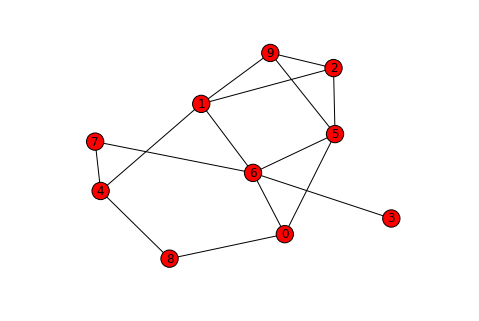

In [28]:
seed(123)
e_r_g = nx.erdos_renyi_graph(10, 0.3)
nx.draw(e_r_g)

In [33]:
graph = array(nx.adjacency_matrix(e_r_g))
print(graph)
#graph = np.array([[0,1,1,0,0,0],[1,0,1,0,0,0],[1,1,0,1,0,0],[0,0,1,0,1,1],[0,0,0,1,0,1],[0,0,0,1,1,0]])
degrees = np.sum(graph, axis = 1) 
n = len(graph)
all_nodes = np.eye(n)
clusters = [Cluster(all_nodes[i],graph[i].astype(float),degrees) for i in range(n)]
clustered = [0 for i in range(n)]
#for i in range(n):
#    print(clusters[i].nodes) 
where_we_are = [9]
for i in range(15):
    here = where_we_are[-1]
    print("here",here)
    print(clusters[here].get_closest())
    
    next_node, next_area, next_perimeter, alpha = clusters[here].get_closest()
    print("has parent", clusters[next_node].parent)
    while(clusters[next_node].parent):
        next_node = clusters[next_node].parentId
    if(clusters[next_node].parent):
        print("in if")
    else: 
        #print("else", next_node)
        #print(clusters[next_node].get_closest())
        next_node_best, not_using, not_using2, not_using3 = clusters[next_node].get_closest()
        if(clusters[here].nodes[next_node_best] == 1):
            print("match!")
            clusters[here].add_nodes(clusters[next_node].nodes,clusters[next_node].weights)
            #clusters[here].add_node(next_node,graph[next_node].astype(float),next_area,next_perimeter)
            
            clusters[next_node].parent = clusters[here]
            clusters[next_node].parentId = here
            #for i in range(n):
            #    print(clusters[i].nodes)  
            #clustered[next_node] = 1
            #clustered[here] = 1
        else:
            print("havnt gotten here yet")
            where_we_are.append(next_node)
            
for i in range(n):
    print(clusters[i].nodes)           

[[ 0.  0.  0.  0.  0.  1.  1.  0.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  1.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  1.  1.  0.]
 [ 1.  0.  1.  0.  0.  0.  1.  0.  0.  1.]
 [ 1.  1.  0.  1.  0.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  1.  0.  0.  0.  0.]]
here 9
(2, 1.0, 4.0, 0.0)
has parent None
match!
add_nodes[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  1.] [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  1.] 1.0 4.0
here 9
(1, 3.0, 4.0, 0.33333333333333331)
has parent None
match!
add_nodes[ 0.  1.  1.  0.  0.  0.  0.  0.  0.  1.] [ 0.  1.  1.  0.  0.  0.  0.  0.  0.  1.] 3.0 4.0
here 9
(5, 5.0, 4.0, 0.59999999999999998)
has parent None
havnt gotten here yet
here 5
(0, 1.0, 5.0, 0.0)
has parent None
havnt gotten here yet
here 0
(8, 1.0, 3.0, 0.0)
has parent None
match!
add_nodes[ 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.] [ 1.  0. 